In [77]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize

In [78]:
dictionary = cv2.aruco.getPredefinedDictionary(cv2.aruco.DICT_4X4_1000)
parameters = cv2.aruco.DetectorParameters()
parameters.cornerRefinementMethod = cv2.aruco.CORNER_REFINE_SUBPIX
ArucoDetector = cv2.aruco.ArucoDetector(dictionary, parameters)

In [79]:
# #aruco test
# im = cv2.imread('frame10.jpg')
# grayScale = cv2.cvtColor(im, cv2.COLOR_BGR2GRAY)
# (corners1, ids1, rejectedImgPoints) = ArucoDetector.detectMarkers(im)
# print(len(rejectedImgPoints))
# print(corners1, ids1, rejectedImgPoints)

(1080, 1920, 3)
(720, 1280, 3)
[2.10755885 0.65326294 2.17308982]


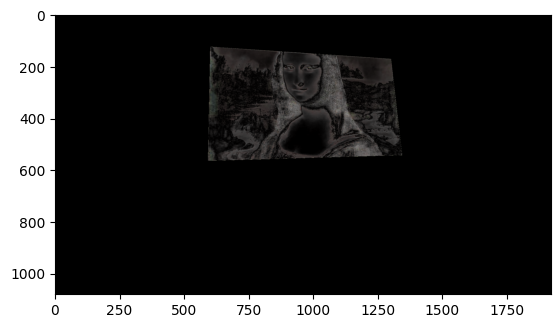

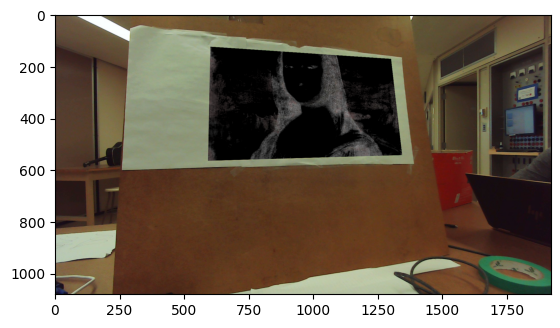

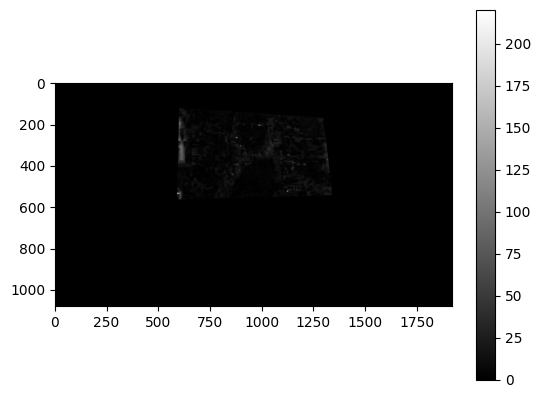

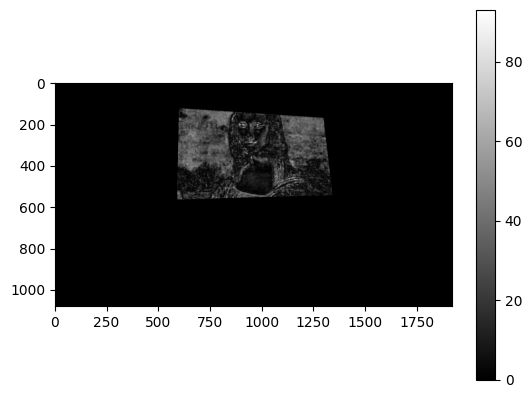

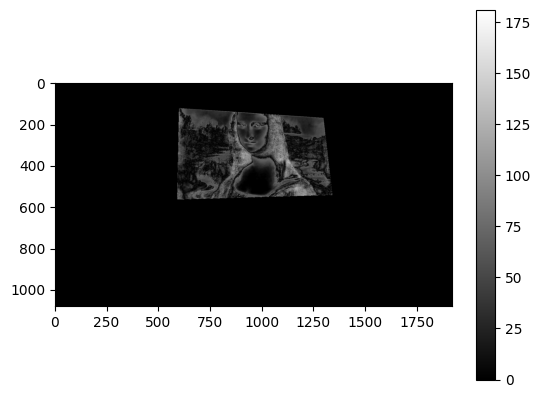

In [80]:
camPicture = cv2.imread("frame14.jpg")
camPicture = cv2.cvtColor(camPicture, cv2.COLOR_BGR2HSV)
row, col, ch = camPicture.shape
print(camPicture.shape)
refImage = cv2.imread("slide3.PNG")
refImage = cv2.cvtColor(refImage, cv2.COLOR_BGR2HSV)
#resize to 1920x1080
print(refImage.shape)
pts1 = np.float32([[0,0],[1280,0],[0,720],[1280,720]])
pts2 = np.float32([[600,126],[1298,173],[591,566],[1341,544]])
matrix = cv2.getPerspectiveTransform(pts1,pts2)
dst = cv2.warpPerspective(refImage,matrix,(col,row))
targetVals = cv2.split(camPicture[300,300])[0]
targetVals = [int(targetVals[0][0]), int(targetVals[1][0]), int(targetVals[2][0])]
def subtractImage(channelScales, base, dist, targets):
    mask = cv2.inRange(dist, np.array([1,1,1]), np.array([255,255,255]))
    h,s,v = cv2.split(dist)
    h = cv2.multiply(h, channelScales[0])
    s = cv2.multiply(s, channelScales[1])
    v = cv2.multiply(v, channelScales[2])
    dist = cv2.merge((h,s,v))
    
    h,s,v = cv2.split(base)
    h = cv2.bitwise_and(h, mask)
    s = cv2.bitwise_and(s, mask)
    v = cv2.bitwise_and(v, mask)
    base = cv2.merge((h,s,v))
    sub = cv2.absdiff(base, dist)
    return np.sum(sub)
params = minimize(subtractImage, [1,1,1], args=(camPicture, dst, targetVals), method='Nelder-Mead', bounds=((0, 10), (0, 10), (0, 10)))
print(params.x)
mask = cv2.inRange(dst, np.array([1,1,1]), np.array([255,255,255]))
h,s,v = cv2.split(dst)
h = cv2.multiply(h, params.x[0])
s = cv2.multiply(s, params.x[1])
v = cv2.multiply(v, params.x[2])
dst = cv2.merge((h,s,v))
absDiff = cv2.absdiff(camPicture, dst)

#mask out the absDiff
h,s,v = cv2.split(absDiff)
h = cv2.bitwise_and(h, mask)
s = cv2.bitwise_and(s, mask)
v = cv2.bitwise_and(v, mask)
absDiff = cv2.merge((h,s,v))
plt.imshow(cv2.cvtColor(absDiff, cv2.COLOR_HSV2RGB))
plt.show()
sub = cv2.subtract(camPicture, dst)
plt.imshow(cv2.cvtColor(sub, cv2.COLOR_HSV2RGB))
plt.show()
h,s,v = cv2.split(absDiff)
plt.imshow(h, cmap='gray')
plt.colorbar()
plt.show()
plt.imshow(s, cmap='gray')
plt.colorbar()
plt.show()
plt.imshow(v, cmap='gray')
plt.colorbar()
plt.show()

    

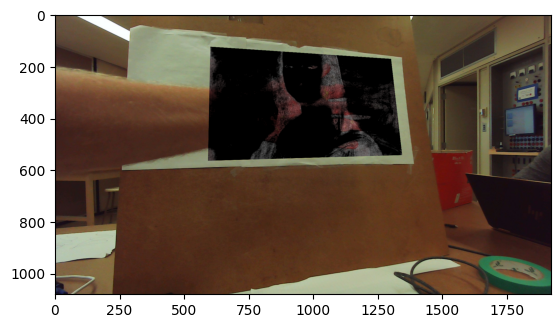

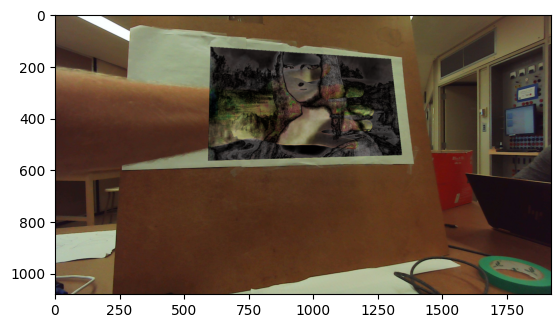

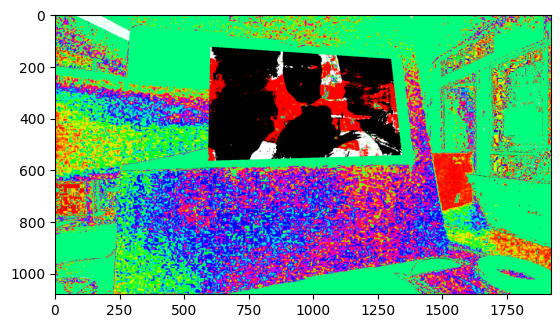

In [87]:
imWithHand = cv2.imread('frame15.jpg')
imWithHand = cv2.cvtColor(imWithHand, cv2.COLOR_BGR2HSV)
h,s,v = cv2.split(dst)
v = np.zeros_like(v)
dis2 = cv2.merge((h,s,v))
sub = cv2.subtract(imWithHand, dst)
absDiff = cv2.absdiff(imWithHand, dst)
plt.imshow(cv2.cvtColor(sub, cv2.COLOR_HSV2RGB))
plt.show()
plt.imshow(cv2.cvtColor(absDiff, cv2.COLOR_HSV2RGB))
plt.show()
plt.imshow(cv2.cvtColor(cv2.multiply(absDiff, sub), cv2.COLOR_HSV2RGB))
plt.show()